### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [19]:
import pandas as pd
raw_data = pd.read_csv('./github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

In [20]:
# 删除重复数据，并输出去重前后的数据量
initial_size = data.shape[0]
data.drop_duplicates(inplace=True)
final_size = data.shape[0]
print(f"初始大小: {initial_size}, 去重后数据量: {final_size}")

初始大小: 20358, 去重后数据量: 19779


# 缺失值处理

In [21]:
# 去掉gravatar_id
data.drop(columns=['gravatar_id'], inplace=True)
# 查看缺失情况
print("缺失情况：")
print(data.isnull().sum())

缺失情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [22]:
# 将可转化成 boolean 变量的列字段转化成 boolean 变量
data = data.copy()
data['company'] = data['company'].astype(bool)
data['location'] = data['location'].astype(bool)
data['email'] = data['email'].astype(bool)
data['hireable'] = data['hireable'].astype(bool)
data['twitter_username'] = data['twitter_username'].astype(bool)
data = data.fillna('')

print("处理后缺失值:")
print(data.isnull().sum())

处理后缺失值:
actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


In [23]:
# 将created_at、updated_at转为时间戳
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
data['updated_at'] = pd.to_datetime(data['updated_at'], errors='coerce')
print("前2行的时间戳：")
print(data['created_at'].head(n=2))
print(data['updated_at'].head(n=2))
print(data[['created_at', 'updated_at']].dtypes)

前2行的时间戳：
0   2011-09-26 17:27:03+00:00
1   2015-06-29 10:12:46+00:00
Name: created_at, dtype: datetime64[ns, UTC]
0   2023-10-13 11:21:10+00:00
1   2023-10-07 06:26:14+00:00
Name: updated_at, dtype: datetime64[ns, UTC]
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
dtype: object


#  可视化bot和hunman类型的情况

机器人账号数量较少，通常用于自动化任务或数据收集，并非主要用户群体。这反映了机器人在GitHub中的辅助角色。

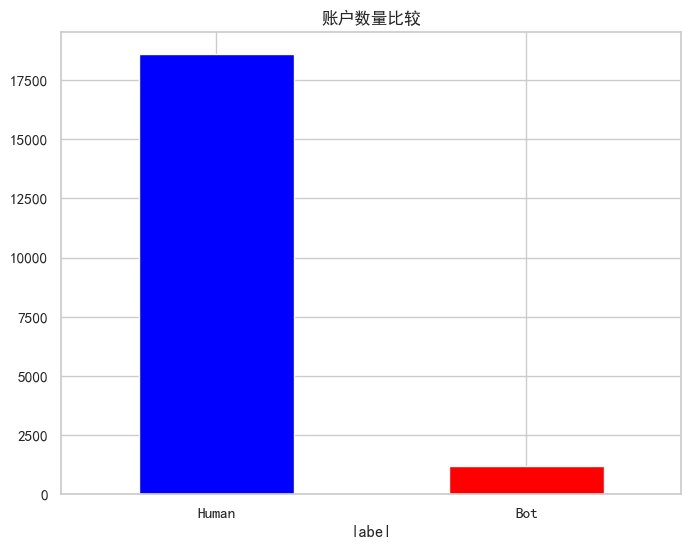

In [24]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
label_counts = data['label'].value_counts()

# 绘制柱状图
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("账户数量比较")
plt.xticks(rotation=0)
plt.show()

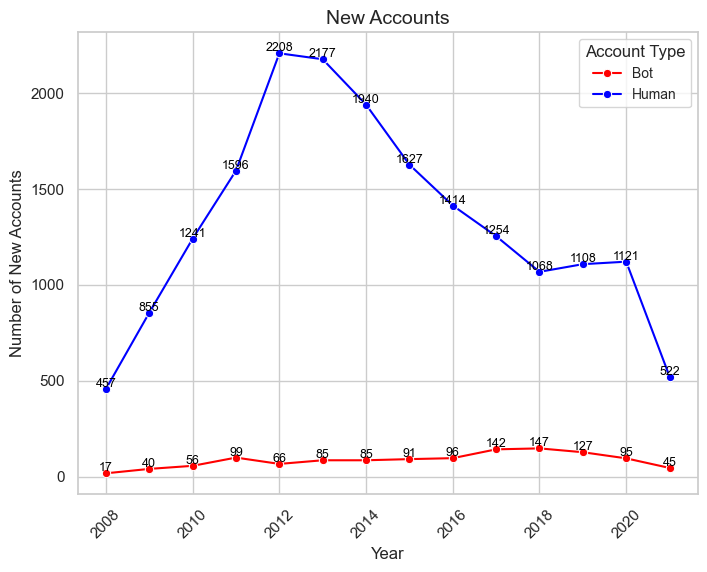

In [25]:
import pandas as pd
import seaborn as sns

data['year'] = data['created_at'].dt.year  

bot_counts = data[data['label'] == 'Bot'].groupby('year').size()
human_counts = data[data['label'] == 'Human'].groupby('year').size()

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')

sns.lineplot(x=bot_counts.index, y=bot_counts.values, label='Bot', color='red', marker='o')
for x, y in zip(bot_counts.index, bot_counts.values):
    plt.text(x, y + 10, str(y), color='black', ha='center', fontsize=9)

sns.lineplot(x=human_counts.index, y=human_counts.values, label='Human', color='blue', marker='o')
for x, y in zip(human_counts.index, human_counts.values):
    plt.text(x, y + 10, str(y), color='black', ha='center', fontsize=9)
 
plt.title('New Accounts', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of New Accounts', fontsize=12)
plt.legend(title='Account Type', fontsize=10)
plt.xticks(rotation=45)  

plt.show()

反映Bot和Human两类账号每年的新增数量变化趋势，便于对比两类账号的数量变化

# 可视化bot类型账号的created_at情况

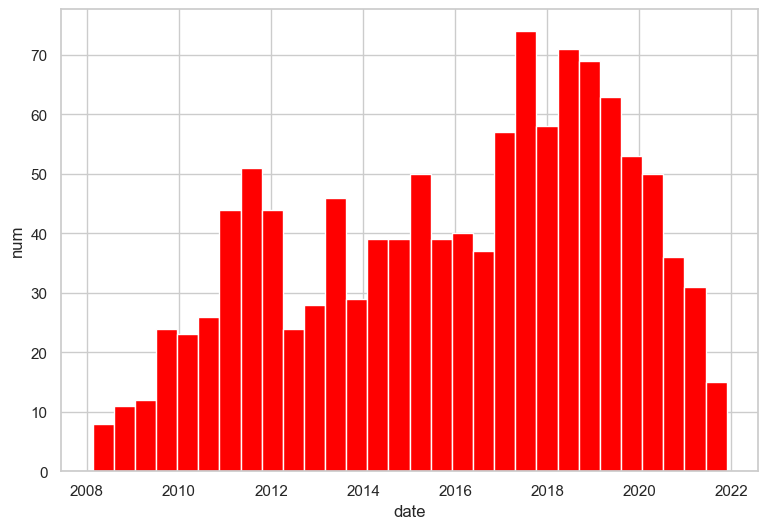

In [26]:

bot_created_at = data[data['label'] == 'Bot']['created_at']

plt.figure(figsize=(9, 6))
bot_created_at.hist(bins=30, color='red')
plt.xlabel("date")
plt.ylabel("num")
plt.show()

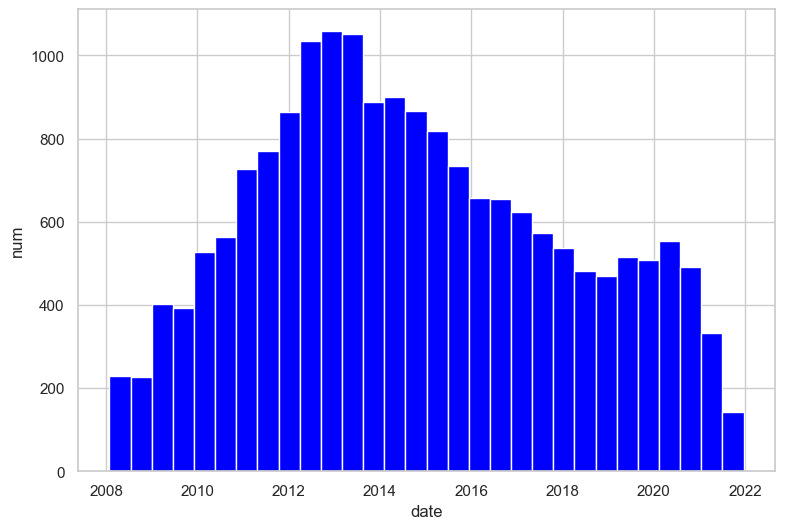

In [27]:
# 提取Human类型账号的创建时间
human_created_at = data[data['label'] == 'Human']['created_at']

plt.figure(figsize=(9, 6))
human_created_at.hist(bins=30, color='blue')
plt.xlabel("date")
plt.ylabel("num")
plt.show()

# 可视化bot类型账号的followers和following情况

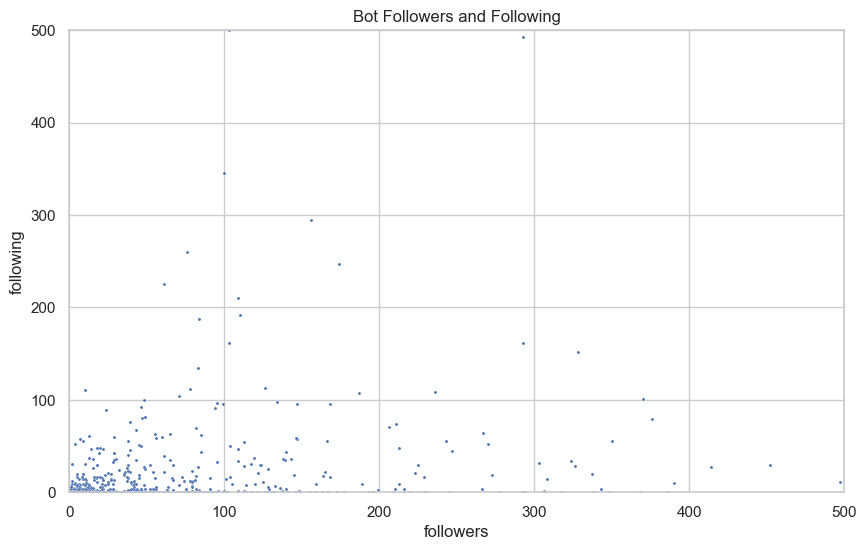

In [28]:
bot_data = data[data['label'] == 'Bot']

bot_data = bot_data[['followers', 'following']]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='following', data=bot_data, s = 5)
plt.title('Bot Followers and Following')
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.show()

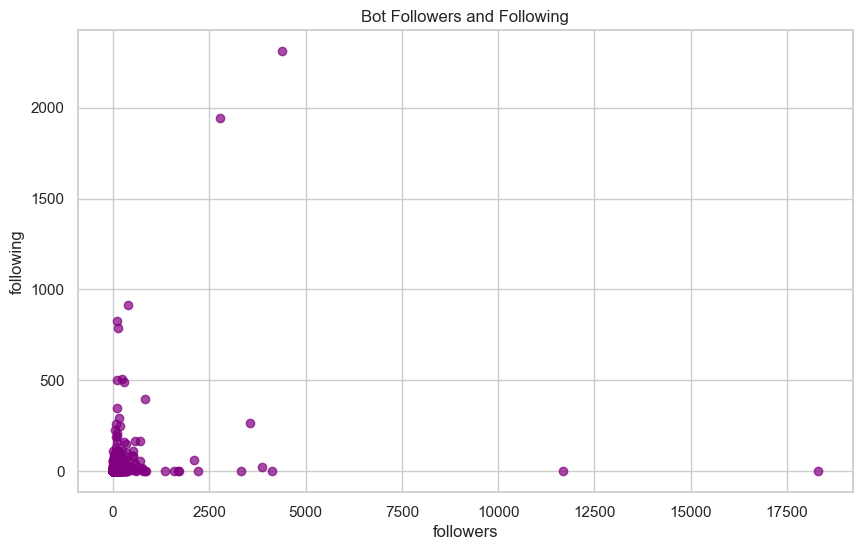

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(bot_data['followers'], bot_data['following'], alpha=0.7, color='purple')
plt.title("Bot Followers and Following")
plt.xlabel("followers")
plt.ylabel("following")
plt.show()

# 可视化human类型账号的followers和following情况

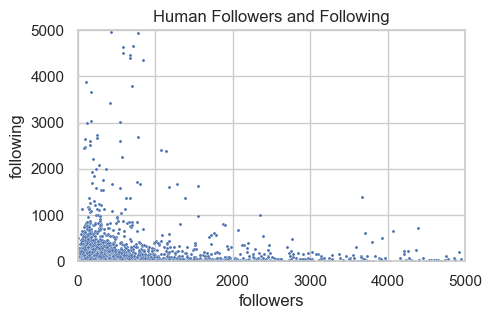

In [30]:

human_data = data[data['label'] == 'Human']
human_data = human_data[['followers', 'following']]
plt.figure(figsize=(5,3))
sns.scatterplot(x='followers', y='following', data=human_data, s = 5)
plt.title('Human Followers and Following')
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.show()